# Full workflow with CLI scripts

This notebook demonstrates how to:
1. Compile the Cython extension
2. Run adaptive benchmark via `evaluate.py`
3. Compare results via `methods.py`
4. Plot speed-ups via `graphs.py`

In [ ]:
# Code to run on the terminal before : 
# rm -rf build/ dist/ *.egg-info
# python env.py build_ext --inplace
# pip install -e .

In [ ]:
# !pip install -r requirements.txt
# !pip install cma

In [1]:
%%bash
# Compile Cython extension
cd ../att_bench_lib
python build_att_ext.py build_ext --inplace
cd -

/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/notebooks


python: can't open file '/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/att_bench_lib/build_att_ext.py': [Errno 2] No such file or directory


In [ ]:
# Install project in editable mode
# pip install -e .

In [2]:
# Make sure the parent folder (where `src/` lives) is on sys.path
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

print("Project root added to sys.path:", PROJECT_ROOT)

Project root added to sys.path: /Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A


In [3]:
# Environment setup 

from src.benchmark.evaluate import run_benchmark
import numpy as np
import os

from pathlib import Path

# Ouput directroy 
OUTPUT = PROJECT_ROOT / "output"
OUTPUT.mkdir(exist_ok=True)

print("Writing CSVs into", OUTPUT)

Writing CSVs into /Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/output


In [4]:
# List of methods to compare
methods = ['random', 'hyperband', 'bayes', 'cmaes', 'bandit', 'doe']

for m in methods:
    print(f"\n=== Running method: {m} ===")
    run_benchmark(
        dims   =[2,4,8,16,32,64,128,256,512,1024],
        threads=[1,2,4,8],
        blocks =[8,16,32,64],
        dtypes =[np.float32, np.float64],
        method =m,
        max_iters=15,
        out_dir =str(OUTPUT)
    )


=== Running method: random ===

[INFO] Running dim=2, method=random


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.



[INFO] Running dim=4, method=random

[INFO] Running dim=8, method=random

[INFO] Running dim=16, method=random

[INFO] Running dim=32, method=random

[INFO] Running dim=64, method=random

[INFO] Running dim=128, method=random

[INFO] Running dim=256, method=random

[INFO] Running dim=512, method=random

[INFO] Running dim=1024, method=random

[INFO] Saved summary to /Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/output/random.csv

=== Running method: hyperband ===

[INFO] Running dim=2, method=hyperband

[INFO] Running dim=4, method=hyperband

[INFO] Running dim=8, method=hyperband

[INFO] Running dim=16, method=hyperband

[INFO] Running dim=32, method=hyperband

[INFO] Running dim=64, method=hyperband

[INFO] Running dim=128, method=hyperband

[INFO] Running dim=256, method=hyperband

[INFO] Running dim=512, method=hyperband

[INFO] Running dim=1024, method=hyperband

[INFO] Saved summary to /Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Mach

In [5]:
from src.benchmark.methods import compare_results

base = 'random'
for m in methods:
    if m == base: 
        continue
    print(f"\n### Compare {base} vs {m}")
    df_cmp, stats = compare_results(
        str(OUTPUT/f'{base}.csv'),
        str(OUTPUT/f'{m}.csv'),
        key_cols=['dim'],
        name1=base,
        name2=m
    )
    print(stats)


### Compare random vs hyperband


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ dim  ┃      mean_random       ┃     mean_hyperband     ┃          delta          ┃   best    ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│  2   │ 1.0891599999851563e-05 │ 1.026660000178481e-05  │  -6.24999998066754e-07  │ hyperband │
│  4   │ 1.0454199999365698e-05 │ 1.045830000023784e-05  │  4.100000872141218e-09  │  random   │
│  8   │ 1.1212400000459866e-05 │ 1.1524899998960335e-05 │  3.124999985004696e-07  │  random   │
│  16  │ 1.442899999997138e-05  │ 1.451249999959714e-05  │  8.349999962575895e-08  │  random   │
│  32  │ 2.4333500000039977e-05 │ 2.4191600000733616e-05 │ -1.4189999930636077e-07 │ hyperband │
│  64  │ 7.482920000025927e-05  │ 7.246670000000676e-05  │ -2.362500000252507e-06  │ hyperband │
│ 128  │   0.0003694332999998   │   0.0009967332999977   │  0.0006272999999978999  │  random   │
│ 256  │   0.0042284376000001   │   0.0024070124000004   │ -0.0018214251999996997  │ hyperband │
│ 512  │   0.0066839665999999   │   0.0078445707999996   │   0.0011606041999997    │  random   │
│ 1024 │   0.0313700666000002   │   0.0321321709999985   │  0.0007621043999983049  │  random   │
└──────┴────────────────────────┴────────────────────────┴─────────────────────────┴───────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/output/summary_random_vs_hyperband.cs
v

{'total_cases': 10, 'random_wins': 6, 'hyperband_wins': 4, 'ties': 0, 'pct_random': 60.0, 'pct_hyperband': 40.0, 'pct_ties': 0.0, 'avg_delta': 7.258540999975779e-05}

### Compare random vs bayes


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ dim  ┃      mean_random       ┃       mean_bayes       ┃         delta          ┃  best  ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│  2   │ 1.0891599999851563e-05 │ 1.0349799999431751e-05 │ -5.41800000419812e-07  │ bayes  │
│  4   │ 1.0454199999365698e-05 │ 1.0712299999937612e-05 │ 2.581000005719134e-07  │ random │
│  8   │ 1.1212400000459866e-05 │ 1.0924999998707109e-05 │ -2.874000017527568e-07 │ bayes  │
│  16  │ 1.442899999997138e-05  │ 1.4120699999153884e-05 │ -3.08300000817497e-07  │ bayes  │
│  32  │ 2.4333500000039977e-05 │  2.42622999998332e-05  │ -7.120000020677795e-08 │ bayes  │
│  64  │ 7.482920000025927e-05  │ 7.224580000126934e-05  │ -2.58339999898993e-06  │ bayes  │
│ 128  │   0.0003694332999998   │   0.0007581375000015   │   0.0003887042000017   │ random │
│ 256  │   0.0042284376000001   │   0.0023387293000006   │ -0.0018897082999994996 │ bayes  │
│ 512  │   0.0066839665999999   │   0.0084073663999994   │ 0.0017233997999994994  │ random │
│ 1024 │   0.0313700666000002   │   0.0316131874000007   │ 0.0002431208000005028  │ random │
└──────┴────────────────────────┴────────────────────────┴────────────────────────┴────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/output/summary_random_vs_bayes.csv

{'total_cases': 10, 'random_wins': 4, 'bayes_wins': 6, 'ties': 0, 'pct_random': 40.0, 'pct_bayes': 60.0, 'pct_ties': 0.0, 'avg_delta': 4.619825000005877e-05}

### Compare random vs cmaes


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ dim  ┃      mean_random       ┃       mean_cmaes       ┃          delta          ┃  best  ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│  2   │ 1.0891599999851563e-05 │ 1.068340000074386e-05  │ -2.0819999910770412e-07 │ cmaes  │
│  4   │ 1.0454199999365698e-05 │ 1.0429099998532364e-05 │ -2.5100000833333863e-08 │ cmaes  │
│  8   │ 1.1212400000459866e-05 │ 1.099169999889682e-05  │ -2.2070000156304627e-07 │ cmaes  │
│  16  │ 1.442899999997138e-05  │ 2.1179199998755392e-05 │ 6.7501999987840115e-06  │ random │
│  32  │ 2.4333500000039977e-05 │  2.37167999998178e-05  │ -6.167000002221771e-07  │ cmaes  │
│  64  │ 7.482920000025927e-05  │ 7.250019999958113e-05  │ -2.329000000678139e-06  │ cmaes  │
│ 128  │   0.0003694332999998   │      0.0007180374      │ 0.00034860410000019993  │ random │
│ 256  │   0.0042284376000001   │   0.0022547458999994   │   -0.0019736917000007   │ cmaes  │
│ 512  │   0.0066839665999999   │   0.0065705706999978   │ -0.00011339590000210027 │ cmaes  │
│ 1024 │   0.0313700666000002   │   0.0314666668000029   │  9.660020000270414e-05  │ random │
└──────┴────────────────────────┴────────────────────────┴─────────────────────────┴────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/output/summary_random_vs_cmaes.csv

{'total_cases': 10, 'random_wins': 3, 'cmaes_wins': 7, 'ties': 0, 'pct_random': 30.0, 'pct_cmaes': 70.0, 'pct_ties': 0.0, 'avg_delta': -0.00016385328000035167}

### Compare random vs bandit


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ dim  ┃      mean_random       ┃      mean_bandit       ┃          delta          ┃  best  ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│  2   │ 1.0891599999851563e-05 │ 1.0321200001328634e-05 │ -5.703999985229292e-07  │ bandit │
│  4   │ 1.0454199999365698e-05 │ 1.080409999758558e-05  │ 3.4989999821988215e-07  │ random │
│  8   │ 1.1212400000459866e-05 │ 1.1204000001896474e-05 │ -8.399998563391248e-09  │ bandit │
│  16  │ 1.442899999997138e-05  │ 4.654580000078568e-05  │ 3.2116800000814294e-05  │ random │
│  32  │ 2.4333500000039977e-05 │ 2.3729100001901317e-05 │ -6.043999981386592e-07  │ bandit │
│  64  │ 7.482920000025927e-05  │ 7.197479999803136e-05  │ -2.854400002227911e-06  │ bandit │
│ 128  │   0.0003694332999998   │   0.0006828457999986   │ 0.00031341249999879996  │ random │
│ 256  │   0.0042284376000001   │   0.0026741666000006   │ -0.0015542709999994998  │ bandit │
│ 512  │   0.0066839665999999   │   0.0065218667999985   │ -0.00016209980000139994 │ bandit │
│ 1024 │   0.0313700666000002   │   0.0346323624999996   │   0.0032622958999994    │ random │
└──────┴────────────────────────┴────────────────────────┴─────────────────────────┴────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/output/summary_random_vs_bandit.csv

{'total_cases': 10, 'random_wins': 4, 'bandit_wins': 6, 'ties': 0, 'pct_random': 40.0, 'pct_bandit': 60.0, 'pct_ties': 0.0, 'avg_delta': 0.00018877666999988815}

### Compare random vs doe


┏━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ dim  ┃      mean_random       ┃        mean_doe        ┃          delta          ┃  best  ┃
┡━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│  2   │ 1.0891599999851563e-05 │ 1.0629199999812043e-05 │ -2.6240000003952025e-07 │  doe   │
│  4   │ 1.0454199999365698e-05 │ 1.078760000012835e-05  │ 3.3340000076265243e-07  │ random │
│  8   │ 1.1212400000459866e-05 │ 1.2012699998820154e-05 │  8.00299998360288e-07   │ random │
│  16  │ 1.442899999997138e-05  │ 1.4375000000654837e-05 │ -5.399999931654418e-08  │  doe   │
│  32  │ 2.4333500000039977e-05 │ 2.4400099999866145e-05 │  6.659999982616886e-08  │ random │
│  64  │ 7.482920000025927e-05  │ 7.229139999793688e-05  │ -2.5378000023223963e-06 │  doe   │
│ 128  │   0.0003694332999998   │   0.0002923039999998   │ -7.712930000000005e-05  │  doe   │
│ 256  │   0.0042284376000001   │      0.0020991709      │   -0.0021292667000001   │  doe   │
│ 512  │   0.0066839665999999   │   0.0075660997000014   │  0.0008821331000015004  │ random │
│ 1024 │   0.0313700666000002   │   0.0318514041000028   │ 0.00048133750000260017  │ random │
└──────┴────────────────────────┴────────────────────────┴─────────────────────────┴────────┘

[INFO] Saved summary to 
/Users/come/Desktop/ENSAE/Programmation-parallele-pour-le-Machine-Learning-3A/output/summary_random_vs_doe.csv

{'total_cases': 10, 'random_wins': 5, 'doe_wins': 5, 'ties': 0, 'pct_random': 50.0, 'pct_doe': 50.0, 'pct_ties': 0.0, 'avg_delta': -8.445792999987288e-05}


In [6]:
# Multi-method comparison in one table
from src.benchmark.methods import compare_all_methods

csv_map = {
    m: str(OUTPUT / f"{m}.csv")
    for m in methods
}

# Merge them all and pick the best per dimension
df_multi = compare_all_methods(csv_map, key_cols=['dim'])
df_multi

,dim,mean_random,mean_hyperband,mean_bayes,mean_cmaes,mean_bandit,mean_doe,best_method
0,2,0.000011,0.000010,0.000010,0.000011,0.000010,0.000011,hyperband
1,4,0.000010,0.000010,0.000011,0.000010,0.000011,0.000011,cmaes
2,8,0.000011,0.000012,0.000011,0.000011,0.000011,0.000012,bayes
3,16,0.000014,0.000015,0.000014,0.000021,0.000047,0.000014,bayes
4,32,0.000024,0.000024,0.000024,0.000024,0.000024,0.000024,cmaes
5,64,0.000075,0.000072,0.000072,0.000073,0.000072,0.000072,bandit
6,128,0.000369,0.000997,0.000758,0.000718,0.000683,0.000292,doe
7,256,0.004228,0.002407,0.002339,0.002255,0.002674,0.002099,doe
8,512,0.006684,0.007845,0.008407,0.006571,0.006522,0.007566,bandit
9,1024,0.031370,0.032132,0.031613,0.031467,0.034632,0.031851,random


CMAES Speed-ups


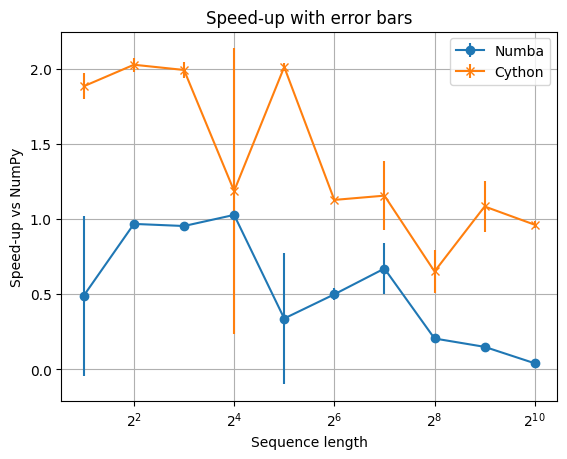

Bayes Speed-ups


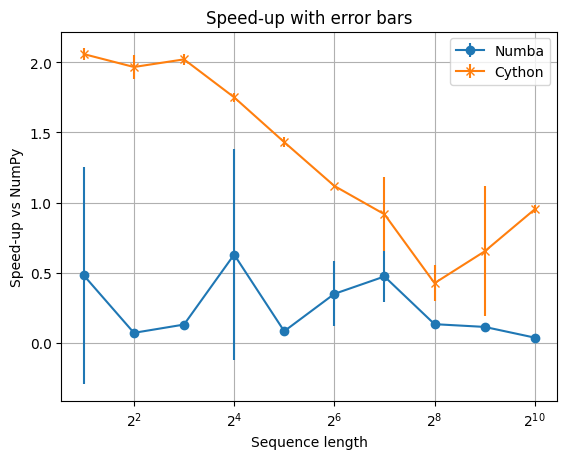

CMAES time


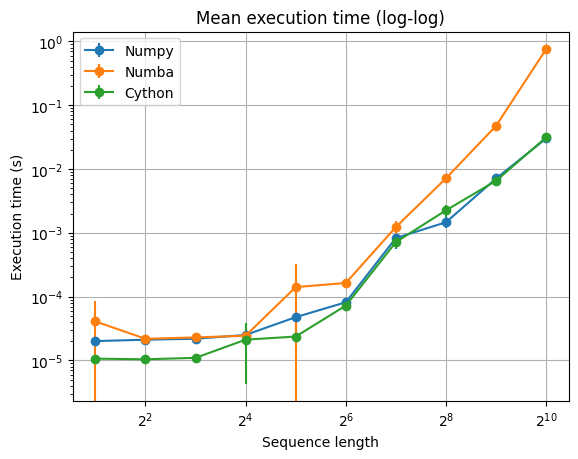

Bayes time


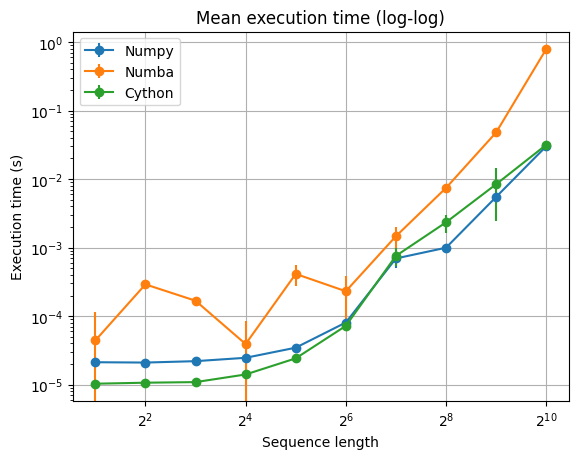

In [7]:
# Plot speed-ups and time : example of Bayes and CMAES
from src.benchmark.graphs import plot_speedups, plot_times

print("CMAES Speed-ups")
plot_speedups(str(OUTPUT / 'cmaes.csv'))
print("Bayes Speed-ups")
plot_speedups(str(OUTPUT / 'bayes.csv'))
print("CMAES time")
plot_times(str(OUTPUT / 'cmaes.csv'))
print("Bayes time")
plot_times(str(OUTPUT / 'bayes.csv'))

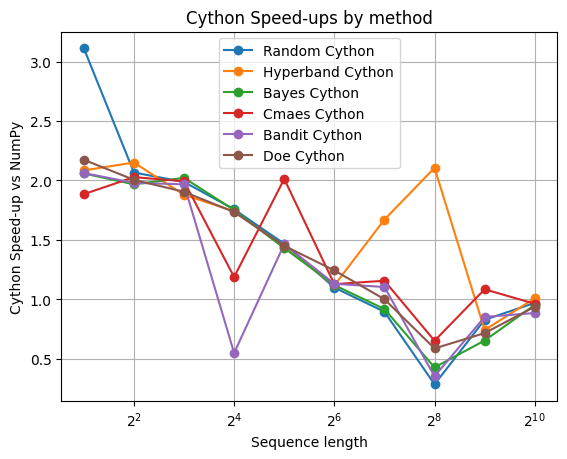

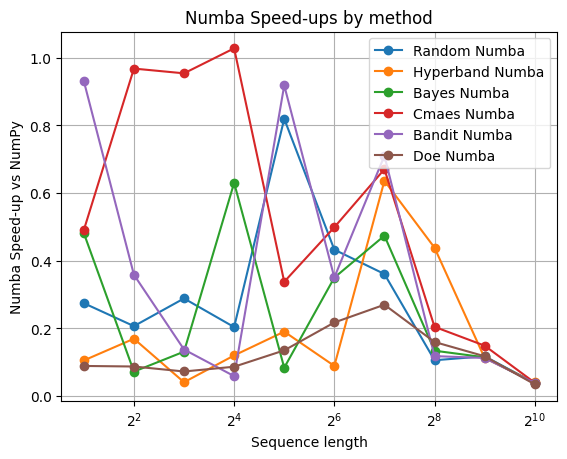

In [8]:
from src.benchmark.graphs import plot_multi_impl_speedups
import pandas as pd

csv_map = {m: str(OUTPUT / f"{m}.csv") for m in methods}

plot_multi_impl_speedups(csv_map, impl='cython')
plot_multi_impl_speedups(csv_map, impl='numba')

### Advanced indicators of efficiency 

In [9]:
from pathlib import Path

OUTPUT = Path().resolve().parent / "output"

records = []
for m in methods:
    csv_path = OUTPUT / f"{m}.csv"
    df = pd.read_csv(csv_path)
    for _, row in df.iterrows():
        records.append({
            'dim': row['dim'],
            'method': m,
            'threads': row['threads'],
            'efficiency_numba': row['speedup_numba'] / row['threads'],
            'efficiency_cython': row['speedup_cython'] / row['threads']
        })

df_eff = pd.DataFrame(records)


pivot_cython = df_eff.pivot(index='dim', columns='method', values='efficiency_cython')
pivot_numba  = df_eff.pivot(index='dim', columns='method', values='efficiency_numba')

print("Parallel efficiency (Cython):")
display(pivot_cython)

print("\nParallel efficiency (Numba):")
display(pivot_numba)

Parallel efficiency (Cython):


method,bandit,bayes,cmaes,doe,hyperband,random
dim,,,,,,
2,1.030844,1.029208,0.628046,2.173268,2.084020,0.777739
4,0.989592,0.983286,1.013592,0.250576,2.150196,0.258269
8,0.983457,1.010481,1.992394,1.904226,1.878177,0.993333
16,0.273835,0.875332,1.186707,0.216630,1.740727,0.219573
32,1.462693,0.715616,2.012287,0.724806,1.435073,1.466600
64,0.565014,0.559605,1.127298,1.242366,1.117007,0.549139
128,0.551448,0.458728,1.155714,0.500257,1.669997,0.223628
256,0.175813,0.213248,0.650979,0.293098,2.105484,0.035537
512,0.425682,0.652803,0.541826,0.357631,0.741465,0.413505



Parallel efficiency (Numba):


method,bandit,bayes,cmaes,doe,hyperband,random
dim,,,,,,
2,0.465369,0.240747,0.163502,0.089119,0.105368,0.068634
4,0.179252,0.036184,0.483796,0.010935,0.169545,0.025842
8,0.068856,0.065685,0.953554,0.072790,0.041011,0.144286
16,0.029534,0.315012,1.027434,0.010854,0.120163,0.025491
32,0.917906,0.041973,0.337797,0.067579,0.190520,0.819223
64,0.175300,0.175008,0.498817,0.217523,0.089207,0.216367
128,0.354979,0.236967,0.670390,0.134982,0.636071,0.090176
256,0.059101,0.067089,0.204679,0.079964,0.438478,0.013246
512,0.056324,0.114644,0.074533,0.058882,0.112572,0.058816
